# CMSC320 Fall 2024 Final Project
## By Arina Petrova, Timothy Kramer

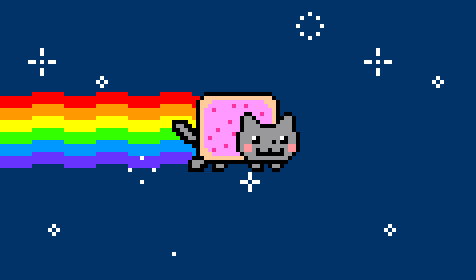